## Linear Regression (MLP)

In [472]:
import numpy as np
import matplotlib.pyplot as plt

## Creating Dataset of shape (2,100)

In [473]:
x=np.random.randint(1,10,size=(2,100))

## Creating Target Variable f=x*y

In [474]:
target=[x[0][i]*x[1][i] for i in range(len(x[0]))] 

In [447]:
target=np.array(target).reshape(1,100)

## Defining Learning Rate

In [448]:
lr=0.001

In [469]:
error=[]  # Array to Store Error for each Epochs

## Network Class (Initialization, Forward Prop, Backward Prop, Update Parameters)

In [454]:
class network():
    global error
    def __init__(self, lst=[]):
        self.li=lst
        self.input=lst[0]
        self.hidn=lst[1:-1]
        #print(self.hidn)
        self.out=lst[-1]
        self.W,self.B=[0]*(len(self.hidn)+1),[0]*(len(self.hidn)+1)
        initial=self.input[0]
        # Initializing weights and bias term with random normal variable
        for i in range(len(self.hidn)):
            self.W[i]=np.random.randn(self.hidn[i],initial)
            self.B[i]=np.random.randn(self.hidn[i],1)
            initial=self.W[i].shape[0]
        self.W[i+1]=np.random.randn(self.out,initial); self.B[i+1]=np.random.randn(self.out,1)
        
    def feed_forward(self,example):
        self.Z=[0]*(len(self.li)-1)
        #print(self.B)
        # Calculating Z=W.X+b
        for i in range(len(self.li)-1):
            if i==0:
                self.Z[i]=np.dot(self.W[i],example)+self.B[i]
            else:
                self.Z[i]=np.dot(self.W[i],self.Z[i-1])+self.B[i]
        feed_forward_op=self.Z[-1]
        #return feed_forward_op  # If we want output at each step then uncomment this.


    def batch_sgd_backprop(self,X,Y):
        self.dZ,self.dW,self.dB=[0]*(len(self.li)-1),[0]*(len(self.li)-1),[0]*(len(self.li)-1)
        #print("-------- {}".format(self.Z[-1]-Y))
        #MSE=1/n*(summition(predicted-actual)^2)
        MSE=np.mean(np.square(self.Z[-1]-Y))
        error.append(MSE)
        print("Mean Squared Error (MSE) : {}".format(MSE))
        # Calculating Gradients (Change in Cost Function with respect to variables)
        for i in reversed(range(len(self.li)-1)):
            #print(i)
            if i==len(self.li)-2:
                self.dZ[i]=(2/Y.shape[1])*(self.Z[i]-Y)
            else:self.dZ[i]=np.dot(self.W[i+1].T,self.dZ[i+1])
            if i!=0:
                self.dW[i]=(1/Y.shape[1])*np.dot(self.dZ[i],self.Z[i-1].T)
                #self.dW.insert((1/len(Y))*np.dot(self.dZ[0],self.Z[i-1].T),0)
            else:
                self.dW[i]=(1/Y.shape[1])*np.dot(self.dZ[i],X.T)
            self.dB[i]=(1/Y.shape[1])*np.sum(self.dZ[i],axis=1)
        
        for i in range(len(self.dB)):
            self.dB[i]=self.dB[i].reshape(len(self.dB[i]),1)
        
        #Updating Values
        for i in range(len(self.li)-1):
            self.W[i]=self.W[i]-(lr*self.dW[i])
            self.B[i]=self.B[i]-(lr*self.dB[i])
#         print("W : {}".format(self.W))
#         print("B : {}".format(self.B))
        
                        

## Initializing network class 

In [455]:
nn=network([[2,100],3,1])

## Creating mini batches to perform mini batch gradient descent

In [456]:
mini_batches=[]
lim=0
while lim<100:
    mini_batches.append(x[:,lim:lim+10])
    lim+=10

## Normalizing the variable (st. Xi=(Xi - mean) / std-dev))

In [457]:
#Normalizing
for i in range(2):
    x[i,:]=(x[i,:]-np.mean(x[i,:]))/np.std(x[i,:])
target[0,:]=(target[0,:]-np.mean(target[0,:]))/np.std(target[0,:])

## Training network for 500 Epochs on mini batches

In [458]:
epochs,i=1,0
while True:
    print("Epoch : {}".format(epochs))
    if epochs==501:
        break
    nn.feed_forward(mini_batches[i%len(mini_batches)])
    nn.batch_sgd_backprop(mini_batches[i%len(mini_batches)],target[:,i%len(mini_batches)*10:(i%len(mini_batches)*10)+10])
    epochs+=1
    i+=1

Epoch : 1
Mean Squared Error (MSE) : 4.792387954529169
Epoch : 2
Mean Squared Error (MSE) : 3.447788203405689
Epoch : 3
Mean Squared Error (MSE) : 3.213923923791884
Epoch : 4
Mean Squared Error (MSE) : 4.762616620758111
Epoch : 5
Mean Squared Error (MSE) : 5.812412662163806
Epoch : 6
Mean Squared Error (MSE) : 3.3394218028337783
Epoch : 7
Mean Squared Error (MSE) : 5.584500794892369
Epoch : 8
Mean Squared Error (MSE) : 4.842619426839774
Epoch : 9
Mean Squared Error (MSE) : 3.1461035931747316
Epoch : 10
Mean Squared Error (MSE) : 4.097970053635494
Epoch : 11
Mean Squared Error (MSE) : 4.705460121897048
Epoch : 12
Mean Squared Error (MSE) : 3.3779536000585617
Epoch : 13
Mean Squared Error (MSE) : 3.137225193615632
Epoch : 14
Mean Squared Error (MSE) : 4.700445283417599
Epoch : 15
Mean Squared Error (MSE) : 5.686475212460784
Epoch : 16
Mean Squared Error (MSE) : 3.2761660815271254
Epoch : 17
Mean Squared Error (MSE) : 5.505150535475684
Epoch : 18
Mean Squared Error (MSE) : 4.7342799842974

Epoch : 314
Mean Squared Error (MSE) : 3.3509310279587474
Epoch : 315
Mean Squared Error (MSE) : 3.2212577184927986
Epoch : 316
Mean Squared Error (MSE) : 2.014496311317518
Epoch : 317
Mean Squared Error (MSE) : 3.715323127528606
Epoch : 318
Mean Squared Error (MSE) : 2.6159934143149495
Epoch : 319
Mean Squared Error (MSE) : 1.7058243597294047
Epoch : 320
Mean Squared Error (MSE) : 2.663692577579879
Epoch : 321
Mean Squared Error (MSE) : 2.919213379148808
Epoch : 322
Mean Squared Error (MSE) : 1.9900308160017672
Epoch : 323
Mean Squared Error (MSE) : 1.6859920306756053
Epoch : 324
Mean Squared Error (MSE) : 3.3172118344614403
Epoch : 325
Mean Squared Error (MSE) : 3.1687051982399836
Epoch : 326
Mean Squared Error (MSE) : 1.9862590162466252
Epoch : 327
Mean Squared Error (MSE) : 3.6695701086336534
Epoch : 328
Mean Squared Error (MSE) : 2.5708049709357046
Epoch : 329
Mean Squared Error (MSE) : 1.6775525639311593
Epoch : 330
Mean Squared Error (MSE) : 2.63238279015474
Epoch : 331
Mean Squ

## Plotting Epochs Vs MSE (Error)

In [464]:
epo=[i for i in range(1,501)]

Text(0, 0.5, 'Mean Squared Error (MSE)')

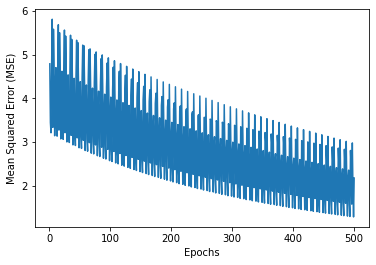

In [467]:
plt.plot(epo,error)
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")

## Checking minimum MSE during Training

In [475]:
print("Minimum MSE : {}".format(min(error)))

Minimum MSE : 1.288651


## If we want to get forward prop for single data point then only remove # from the feed_forward ( I comment it to get better output during training)